In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to loaddataset
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#check for dtypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
#check for shape
df.shape

(768, 9)

In [5]:
#check for null value percentage
df.isnull().sum()/df.shape[0]*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

<Axes: >

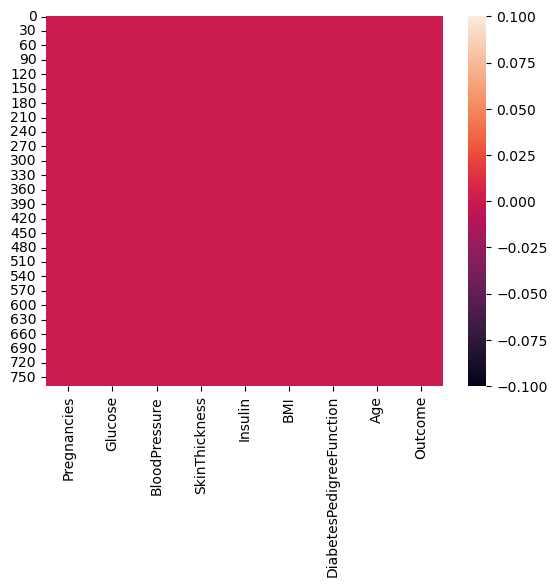

In [6]:
#visualised null value throught heatmap
sb.heatmap(df.isnull())

In [7]:
#duplicated value finding
df.duplicated().sum()

0

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
#X is input and output column
X=df.drop('Outcome',axis=1) #input 
Y=df['Outcome'] #outpu

In [10]:
#train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [11]:
X_train.shape

(537, 8)

In [12]:
Y_train.shape

(537,)

In [13]:
X_test.shape

(231, 8)

In [14]:
Y_test.shape

(231,)

In [15]:
#we use standardScaler
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [16]:
#create object for StandardScaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
#using logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#lets train the model with 70% of data

#we use .fit() method of logisticRegression class
lr.fit(X_train,Y_train)

LogisticRegression()

In [18]:
#testing  the model with 30% of data
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [19]:
#creating dictonary to understand the data
dict={"Acutal op":Y_test,"Predict op":y_pred}
df11=pd.DataFrame(dict)
df11

,Acutal op,Predict op
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
241,0,0
599,0,0
650,0,0
11,1,1


In [20]:
lr.score(X_test,Y_test)

0.7835497835497836

In [21]:
#creatin  a confusion matrix
from sklearn.metrics import confusion_matrix

In [22]:
print(confusion_matrix(Y_test,y_pred))

[[132  14]
 [ 36  49]]


In [23]:
# Recall=Tp/(TP+FN)
#precision =TP/(TP+FP)

In [24]:
#creat a classification report  for the above problemf
from sklearn.metrics import classification_report


In [25]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [26]:
#calling DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
#creating function inside which all function method has been called in a single line
def create_model(model):
    model.fit(X_train,Y_train)
    ypred=model.predict(X_test)
    print(classification_report(Y_test,ypred))
    print(confusion_matrix(Y_test,ypred))
    return model

In [28]:
for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i)
    print('Random state',i)
    dtc=create_model(dtc)

Random state 1
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[117  29]
 [ 42  43]]
Random state 2
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       146
           1       0.62      0.56      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

[[116  30]
 [ 37  48]]
Random state 3
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       146
           1       0.62      0.51      0.56        85

    accuracy                           0.71       231
   macro avg       0.68      0.66    

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       146
           1       0.59      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.68      0.69      0.68       231

[[117  29]
 [ 43  42]]
Random state 27
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       146
           1       0.60      0.49      0.54        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231

[[118  28]
 [ 43  42]]
Random state 28
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       146
           1       0.63      0.55      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       146
           1       0.63      0.55      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

[[118  28]
 [ 38  47]]
Random state 54
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       146
           1       0.61      0.53      0.57        85

    accuracy                           0.70       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.69      0.70      0.70       231

[[117  29]
 [ 40  45]]
Random state 55
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       146
           1       0.63      0.59      0.61        85

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231

[[117  29]
 [ 35  50]]
Random state 80
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       146
           1       0.59      0.54      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231

[[114  32]
 [ 39  46]]
Random state 81
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       146
           1       0.59      0.48      0.53        85

    accuracy                           0.68       231
   macro avg       0.66      0.64      0.65       

In [29]:
dtc=DecisionTreeClassifier(random_state=79)
dtc=create_model(dtc)   #best model in decision Tree classifier

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       146
           1       0.63      0.59      0.61        85

    accuracy                           0.72       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231

[[117  29]
 [ 35  50]]


In [30]:
# #creat a dictanary   it show much informatin has each column has
dict1={"featrues":X.columns,'Informatin gain':dtc.feature_importances_}
df11=pd.DataFrame(dict1)
df11

,featrues,Informatin gain
0,Pregnancies,0.056461
1,Glucose,0.271069
2,BloodPressure,0.160533
3,SkinThickness,0.070264
4,Insulin,0.040499
5,BMI,0.177005
6,DiabetesPedigreeFunction,0.098007
7,Age,0.126162


In [31]:
#to overcome overfit we have 2 pruning technique
#1 Max_depth
#2 min_samples_leaf

In [32]:
# using max depth
# 1.max_depth: inbuilt parameter of decision tree classifier class(minlen=1 and maxlen=8)
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max depth",i)
    dtc1=create_model(dtc1)

Max depth 1
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]
Max depth 2
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

[[127  19]
 [ 37  48]]
Max depth 3
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73   

In [33]:
dtc1=DecisionTreeClassifier(max_depth=5,random_state=1)
dtc1=create_model(dtc1)  #best model in decision Tree classifier with max depth

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

[[122  24]
 [ 30  55]]


In [34]:
#using min samples leaf 
for i in range(45,101):
    dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

[[125  21]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       146
           1       0.72      0.71      0.71        85

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.79      0.79      0.79       231

[[123  23]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       146
           1       0.71      0.71      0.71        85

    accuracy                           0.79       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.79     

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73      0.72      0.69       231

[[136  10]
 [ 55  30]]
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73      0.72      0.69       231

[[136  10]
 [ 55  30]]
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       146
           1       0.75      0.35      0.48        85

    accuracy                           0.72       231
   macro avg       0.73      0.64      0.64       231
weighted avg       0.73     

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75     

In [35]:
#best value in min sample leaf
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231

[[125  21]
 [ 25  60]]


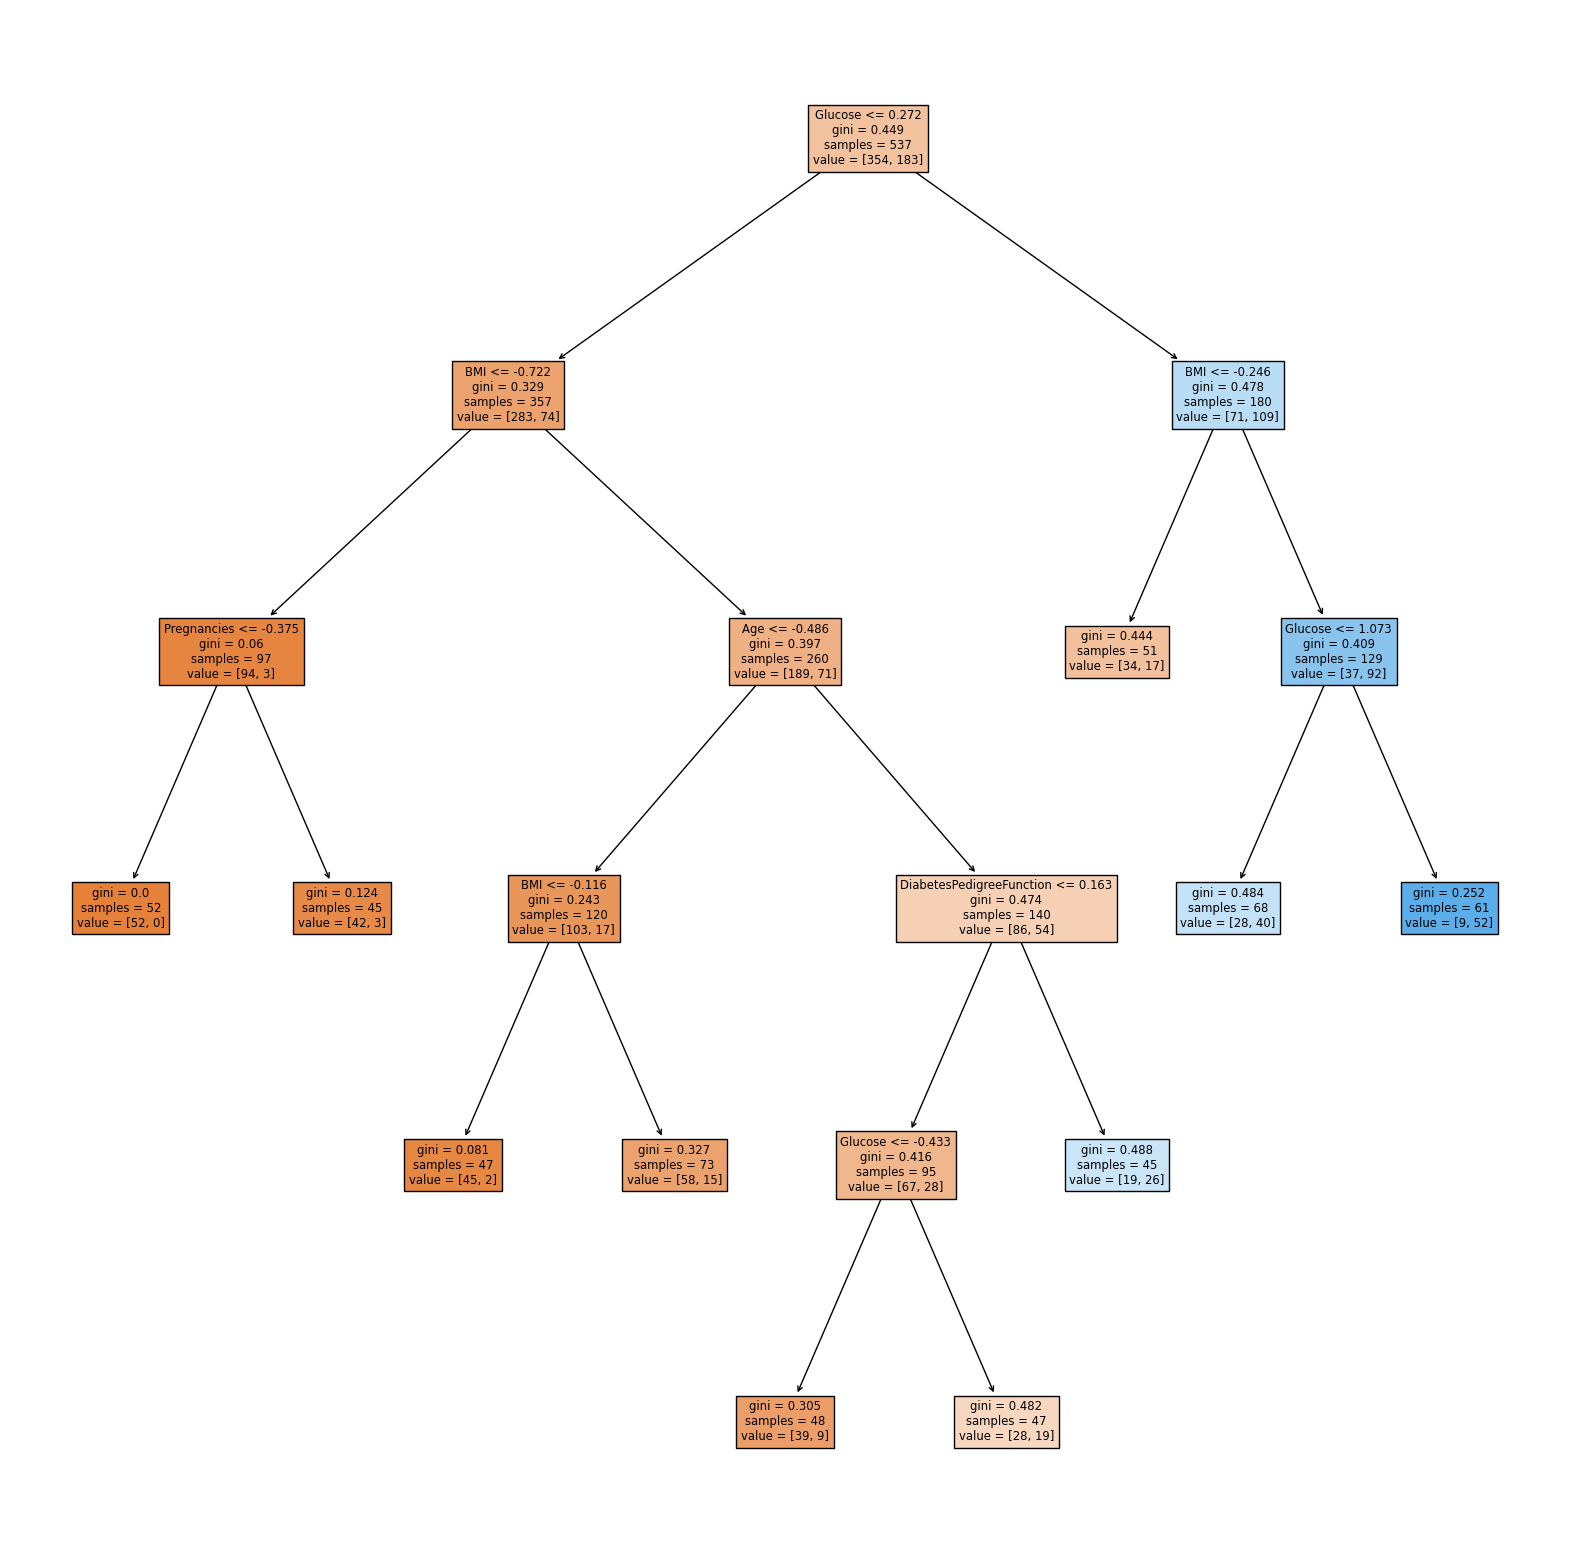

In [36]:
#creating tree using
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc2,feature_names=features,filled=True)

In [37]:
#creat a dictanary   to see for feature selection

dict1={"Features":X.columns,'Information_Gain':dtc2.feature_importances_}


df2=pd.DataFrame(dict1)
df2
df2=df2.sort_values(by='Information_Gain',ascending=False)
df2

,Features,Information_Gain
1,Glucose,0.574068
5,BMI,0.261437
7,Age,0.098884
6,DiabetesPedigreeFunction,0.062856
0,Pregnancies,0.002755
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.000000


In [38]:
#using entropy and min samples leaf
for i in range(45,101):
    dtc3=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
    dtc3=create_model(dtc3)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[133  13]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[133  13]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78     

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[133  13]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[133  13]
 [ 37  48]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       146
           1       0.79      0.56      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78     

In [39]:
#using entropy and max depth
for i in range(1,9):
    dtc4=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print('max _Depth',i)
    dtc4=create_model(dtc4)

max _Depth 1
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       146
           1       0.67      0.69      0.68        85

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.76      0.76      0.76       231

[[117  29]
 [ 26  59]]
max _Depth 2
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

[[124  22]
 [ 31  54]]
max _Depth 3
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75

In [40]:
dtc4=DecisionTreeClassifier(random_state=1,max_depth=7,criterion='entropy')
dtc4=create_model(dtc4) #best value in maxdepth and entropy

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       146
           1       0.68      0.74      0.71        85

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231

[[116  30]
 [ 22  63]]


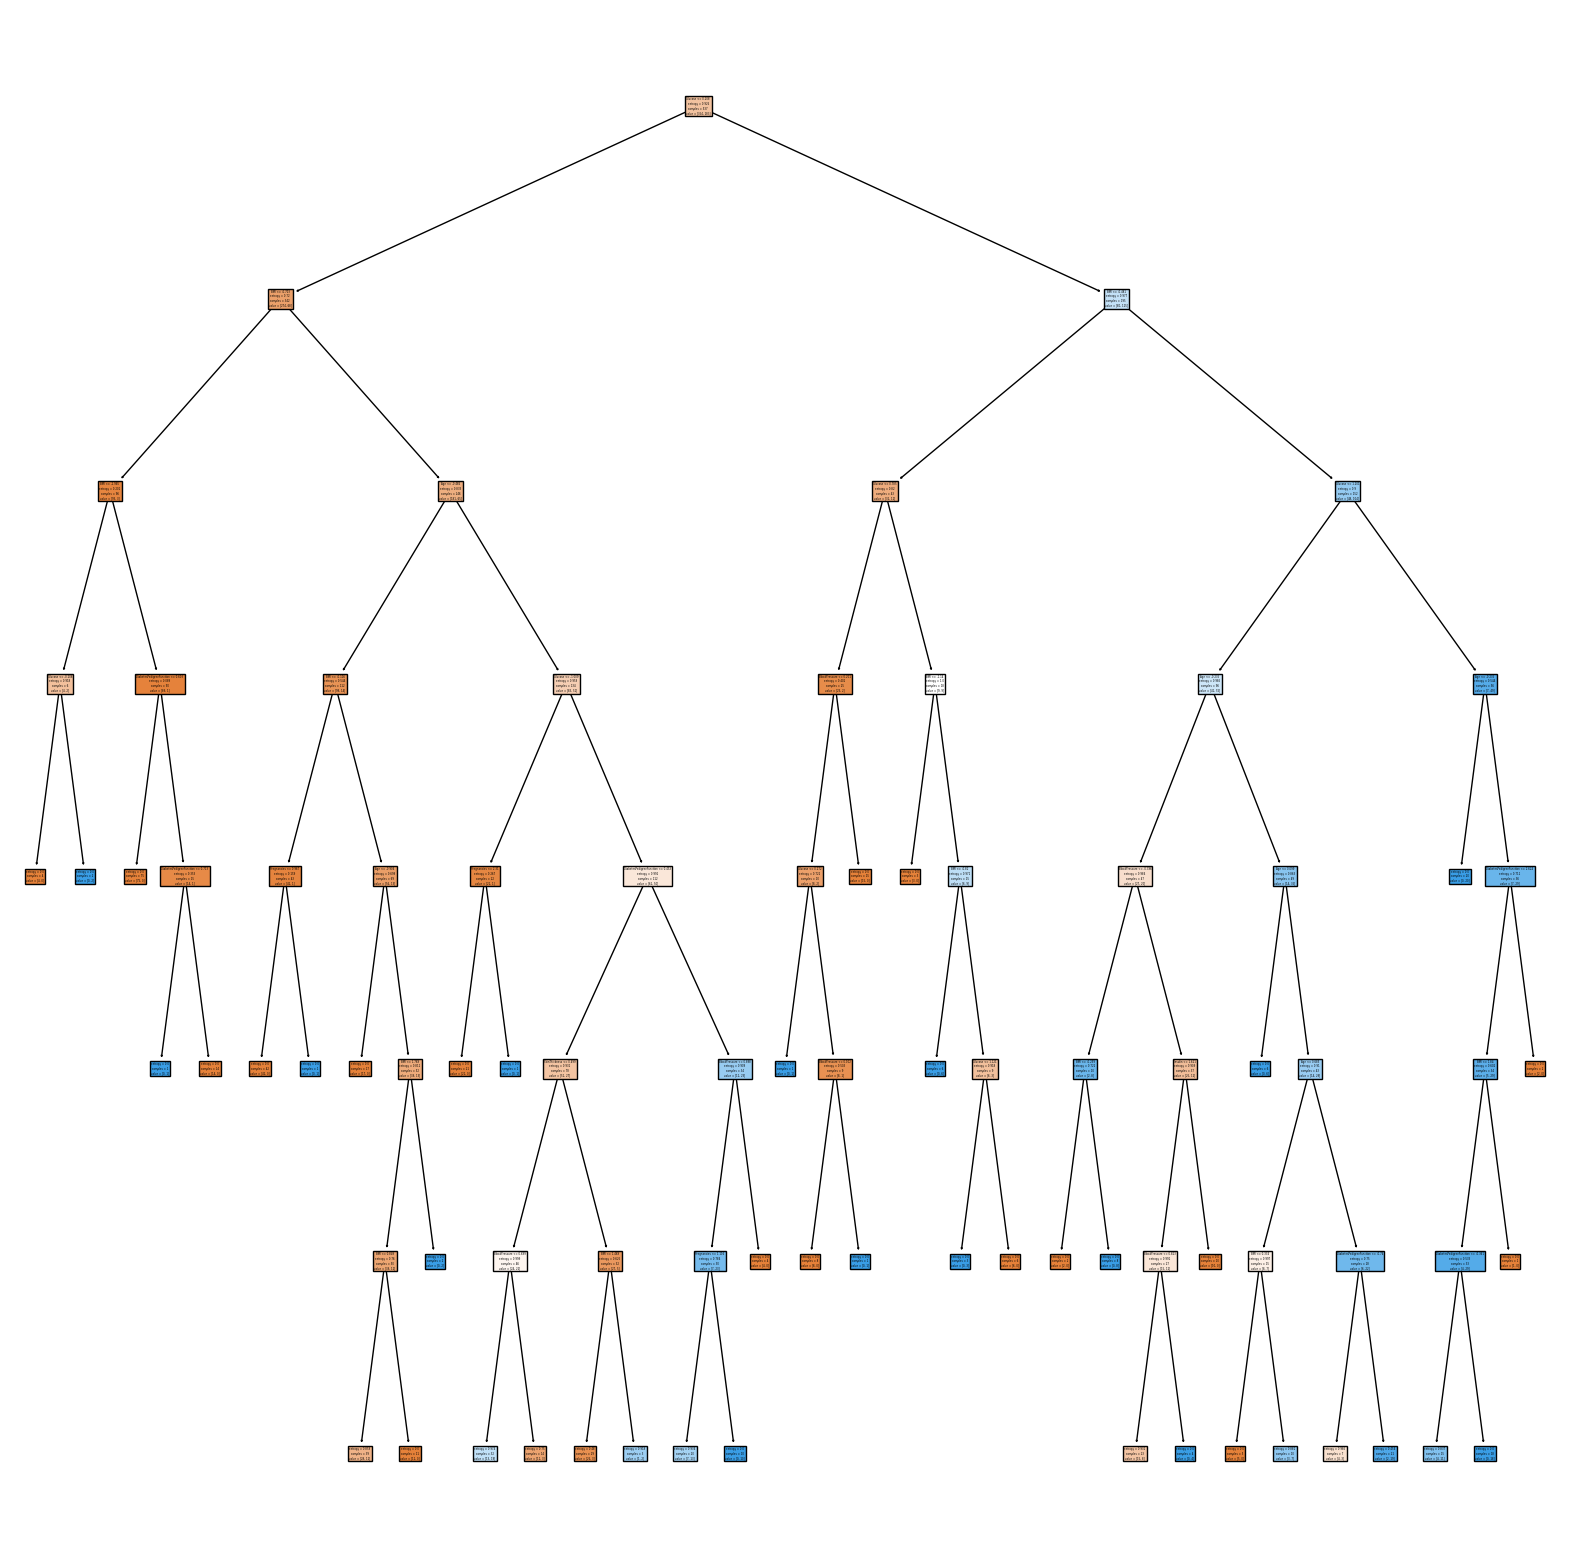

In [41]:
#creating tree using
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc4,feature_names=features,filled=True)

In [42]:
#using ensemble technique
#ensemble techinque
#ensemble technique:- train the dataset with mutliple algorithms and taking the combined score of all algorithms
#bagging:- no of possibilities it will work on every possibility ,once the data is used it will use it again
##pasting it does not work on every possibililties ,once the data is used it is not used again

In [43]:
#using randomForest Algoritms

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier()

In [46]:
# for i in range(1,17):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Maxfeatures ',i)
#     rfc=create_model(rfc)

In [47]:
rfc=RandomForestClassifier(random_state=1,max_features=1)
rfc=create_model(rfc)  #best accuarcy in radom forest algorithm

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       146
           1       0.78      0.64      0.70        85

    accuracy                           0.80       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.80      0.80       231

[[131  15]
 [ 31  54]]


In [48]:
#using boosting technique to obtain optium score

In [49]:
#ada boosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
for i in range(1,17):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("n estimator",i)
    ada=create_model(ada)

n estimator 1
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]
n estimator 2
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       146
           1       0.72      0.58      0.64        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231

[[127  19]
 [ 36  49]]
n estimator 3
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       146
           1       0.72      0.55      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.71      0

In [52]:
ada=AdaBoostClassifier(random_state=1,n_estimators=1)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       146
           1       0.68      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

[[121  25]
 [ 32  53]]


In [53]:
from sklearn.ensemble  import GradientBoostingClassifier

In [54]:
# for i in range(1,101):
#     gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
#     print("No of estimators:",i)
#     gbc=create_model(gbc)

In [55]:
gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

[[128  18]
 [ 34  51]]


In [56]:
from xgboost import XGBClassifier

In [57]:
xgb=XGBClassifier()

In [58]:
# for i in range(1,100):
#     xgb=XGBClassifier(random_state=1,n_estimators=i)
#     print("n_estimators",i)
#     xgb=create_model(xgb)

In [59]:
xgb=XGBClassifier(random_state=1,n_estimators=5)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231

[[129  17]
 [ 30  55]]


In [60]:
from sklearn.svm import SVC

In [61]:
svm=SVC(kernel='rbf')
svm=create_model(svm)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.80      0.58      0.67        85

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

[[134  12]
 [ 36  49]]


In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:

gb = GaussianNB()
gb = create_model(gb)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

[[128  18]
 [ 32  53]]


In [74]:
input_data=(1,85,66,29,0,26.6,0.351,31)
#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data=ss.transform(input_data_reshaped)
print(std_data)
prediction=xgb.predict(std_data)
print(prediction)
if prediction[0]==0:
    print("not diabetes")
else:
    print("diabetes")

[[-0.82270897 -1.15333705 -0.14687221  0.59323809 -0.68822177 -0.68322992
  -0.35200168 -0.19343984]]
[0]
not diabetes


In [75]:
#saving the trained model
import pickle

In [76]:
filename='trained_model.sav'
pickle.dump(xgb,open(filename,'wb'))

In [78]:
#loading the save model
loaded_model=pickle.load(open('trained_model.sav','rb')) #rb read the binary format

input_data=(1,85,66,29,0,26.6,0.351,31)
#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#standardize the input data
std_data=ss.transform(input_data_reshaped)
print(std_data)
prediction=loaded_model.predict(std_data)
print(prediction)
if prediction[0]==0:
    print("not diabetes")
else:
    print("diabetes")

[[-0.82270897 -1.15333705 -0.14687221  0.59323809 -0.68822177 -0.68322992
  -0.35200168 -0.19343984]]
[0]
not diabetes
